<a href="https://colab.research.google.com/github/ChenxiLiu8/ANLY590/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
from keras.datasets import cifar10
from keras.utils import to_categorical
tfkl = tfk.layers

## **Auto Encoder**

#### Load Data 

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

#### Input Layer

In [ ]:
input = tfkl.Input((32,32,3))

#### Build our Convolution Autoenocder

In [ ]:
autoencoder = tfk.Sequential([
  ### Encoder (choose 3*3 kernel )
  tfkl.InputLayer((32,32,3)),                            
  tfkl.Conv2D(filters = 32, kernel_size=3,  
                      padding="same", activation='relu', input_shape=(32,32,3)),
  tfkl.MaxPool2D(pool_size = (2), padding='same'),
  tfkl.Conv2D(filters = 32, kernel_size=3, 
                      padding="same", activation='relu'),
  tfkl.MaxPool2D(pool_size = (2), padding='same'),
  tfkl.Conv2D(filters = 32, kernel_size=3, activation='relu', padding='same'),
  tfkl.MaxPool2D(pool_size = (2), padding='same'),
  ### Decoder
  tfkl.Conv2D(filters = 32, kernel_size=3, padding="same", activation='relu'),
  tfkl.UpSampling2D(size = (2,2)),
  tfkl.Conv2D(filters = 32, kernel_size=3,  
                      padding="same", activation='relu'),
  tfkl.UpSampling2D(size = (2,2)),
  tfkl.Conv2D(filters = 32, kernel_size=3,  
                      padding="same", activation='relu'),
  tfkl.UpSampling2D(size = (2,2)),
  tfkl.Conv2D(filters = 3, kernel_size=1,  activation='sigmoid', padding='same'),
])
autoencoder.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 4, 4, 32)        

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
results = autoencoder.fit(x_train,x_train,epochs=20,steps_per_epoch=10,batch_size=1000)

Epoch 1/20
10/10 [==============================] - 20s 2s/step - loss: 0.6845 - accuracy: 0.2804
Epoch 2/20
10/10 [==============================] - 20s 2s/step - loss: 0.6494 - accuracy: 0.4211
Epoch 3/20
10/10 [==============================] - 20s 2s/step - loss: 0.6312 - accuracy: 0.4285
Epoch 4/20
10/10 [==============================] - 20s 2s/step - loss: 0.6210 - accuracy: 0.4620
Epoch 5/20
10/10 [==============================] - 20s 2s/step - loss: 0.6132 - accuracy: 0.4955
Epoch 6/20
10/10 [==============================] - 20s 2s/step - loss: 0.6088 - accuracy: 0.5321
Epoch 7/20
10/10 [==============================] - 20s 2s/step - loss: 0.6031 - accuracy: 0.5665
Epoch 8/20
10/10 [==============================] - 20s 2s/step - loss: 0.6009 - accuracy: 0.5766
Epoch 9/20
10/10 [==============================] - 20s 2s/step - loss: 0.6021 - accuracy: 0.5757
Epoch 10/20
10/10 [==============================] - 20s 2s/step - loss: 0.5974 - accuracy: 0.5837
Epoch 11/20
10/10 [

#### Graph the accuracy and loss


*   We can see our accuracy increase dramatically
*   slowly regaining losses





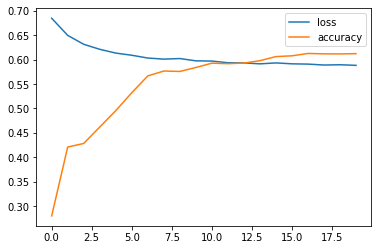

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['accuracy'])
plt.legend(labels=['loss','accuracy'])

In [ ]:
pred_img = autoencoder.predict(x_test)

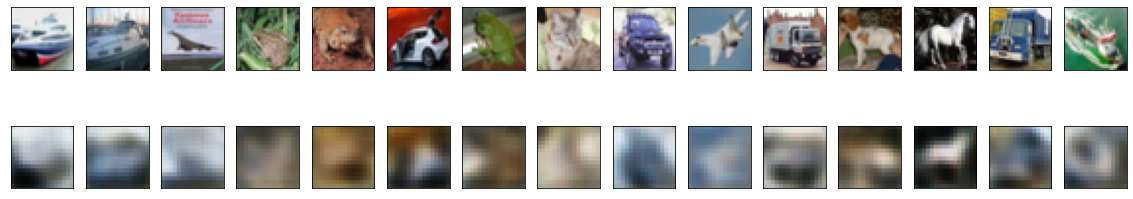

In [ ]:
n = 15
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False
    ax = plt.subplot(2, n, i + n)
    plt.imshow(pred_img[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **Image Classification** 

## （a）

In [ ]:
labels = tf.one_hot(y_train.astype(np.int32),10)

In [ ]:
model = tfk.Sequential([
    tfkl.InputLayer((32,32,3)),
    tfkl.Conv2D(filters = 64, kernel_size= 3, strides= 1, 
                      padding="valid", activation='relu', input_shape=(32, 32, 3)),
    tfkl.MaxPool2D(pool_size=(2)),
    tfkl.Dropout(0.2),
    tfkl.Conv2D(filters = 64, kernel_size= 3, strides= 1, 
                      padding="valid", activation='relu'),
    tfkl.MaxPool2D(pool_size=(2)),
    tfkl.Dropout(0.2),
    tfkl.Conv2D(filters = 64, kernel_size= 3, strides= 1, 
                      padding="valid", activation='relu'),
    tfkl.MaxPool2D(pool_size=(2)),
    tfkl.Dropout(0.2),
    #### flatten
    tfkl.GlobalMaxPool2D(),
    tfkl.Dense(10, activation='softmax')                       
])

model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 4, 4, 64)        

In [ ]:

model.compile(
    optimizer=tfk.optimizers.RMSprop(),
    loss=tfk.losses.CategoricalCrossentropy(),metrics=['accuracy']
)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
results = model.fit(x_train, y_train, batch_size=32,steps_per_epoch=20, epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
20/20 [==============================] - 7s 342ms/step - loss: 2.2973 - accuracy: 0.1406 - val_loss: 2.2755 - val_accuracy: 0.1695
Epoch 2/20
20/20 [==============================] - 7s 332ms/step - loss: 2.2333 - accuracy: 0.1359 - val_loss: 2.2100 - val_accuracy: 0.2133
Epoch 3/20
20/20 [==============================] - 7s 329ms/step - loss: 2.2141 - accuracy: 0.1922 - val_loss: 2.2078 - val_accuracy: 0.1780
Epoch 4/20
20/20 [==============================] - 6s 325ms/step - loss: 2.1396 - accuracy: 0.1859 - val_loss: 2.1534 - val_accuracy: 0.2132
Epoch 5/20
20/20 [==============================] - 7s 326ms/step - loss: 2.1383 - accuracy: 0.1859 - val_loss: 2.1480 - val_accuracy: 0.1966
Epoch 6/20
20/20 [==============================] - 7s 333ms/step - loss: 2.0967 - accuracy: 0.1875 - val_loss: 2.1151 - val_accuracy: 0.2267
Epoch 7/20
20/20 [==============================] - 7s 333ms/step - loss: 2.0590 - accuracy: 0.2469 - val_loss: 2.0383 - val_accuracy: 0.2677
Epoch 

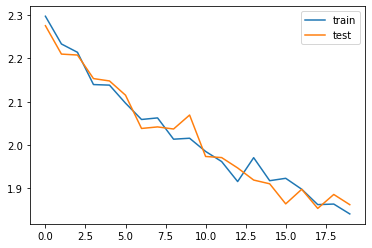

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(labels=['train','test'])

## (b)

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
model = tfk.Sequential([
    tfkl.InputLayer((32,32,3)),
    conv_base,
    tfkl.Flatten(),
    tfkl.Dense(64, activation='relu'),
    tfkl.Dropout(0.5),
    tfkl.Dense(10, activation='softmax')
                         
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 14,748,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
results = model.fit(x_train, y_train, epochs=5, batch_size = 32, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 628s 402ms/step - loss: 1.5838 - accuracy: 0.4437 - val_loss: 1.3479 - val_accuracy: 0.5345
Epoch 2/5
1563/1563 [==============================] - 629s 402ms/step - loss: 1.4380 - accuracy: 0.5038 - val_loss: 1.2915 - val_accuracy: 0.5533
Epoch 3/5
1563/1563 [==============================] - 621s 398ms/step - loss: 1.3977 - accuracy: 0.5237 - val_loss: 1.2748 - val_accuracy: 0.5573
Epoch 4/5
1563/1563 [==============================] - 623s 398ms/step - loss: 1.3837 - accuracy: 0.5277 - val_loss: 1.2580 - val_accuracy: 0.5700
Epoch 5/5
1563/1563 [==============================] - 642s 411ms/step - loss: 1.3845 - accuracy: 0.5336 - val_loss: 1.2661 - val_accuracy: 0.5716


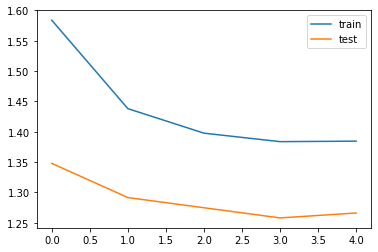

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(labels=['train','test'])

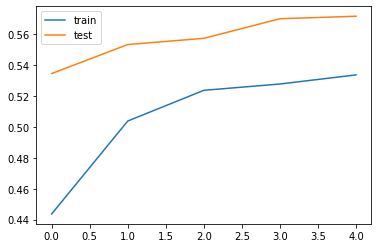

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(labels=['train','test'])

## **Test Classfication**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SPAM_detection.csv to SPAM_detection.csv


In [8]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [9]:
import pandas as pd 
from collections import Counter

In [4]:
df = pd.read_csv('SPAM_detection.csv')

In [5]:
df

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [7]:
x = np.asarray(df['Message'])
y = np.asarray(df['category_val'])

In [19]:
tokenizer = Tokenizer()
## tokenize text so that it is on the word-basis
tokenizer.fit_on_texts(x)
vocab_size = len(tokenizer.word_index)+1
print(vocab_size)
### make the word to sequence and pad them 
sequences = tokenizer.texts_to_sequences(x)
data = pad_sequences(sequences,padding='post')
indices = np.arange(data.shape[0])
## shuffle the data
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

## use 80% cut off  to generate test and train set
cut_off = int(len(df)*0.8)
x_train = data[:cut_off]
y_train = labels[:cut_off]
x_test = data[cut_off:]
y_test = labels[cut_off:]

print(x_train.shape)

9005
(4457, 189)


In [20]:
### build embedding and Simple RNN(RNN) to build the model 
model = tfk.Sequential([
    tfkl.Embedding(vocab_size, 16, input_length=189),
    tfkl.SimpleRNN(128, return_sequences=True),
    tfkl.GlobalMaxPool1D(),
    tfkl.Dropout(0.5),
    tfkl.Dense(64,activation="relu"),
    tfkl.Dropout(0.5),
    tfkl.Dense(1,activation="sigmoid")
                        
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 189, 16)           144080    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 189, 128)          18560     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [21]:
model.compile(loss='binary_crossentropy', optimizer=tfk.optimizers.RMSprop(), metrics=['accuracy'])

In [22]:
results = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=20, steps_per_epoch=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 2s 99ms/step - loss: 0.4244 - accuracy: 0.8766 - val_loss: 0.4122 - val_accuracy: 0.8601
Epoch 2/20
20/20 [==============================] - 2s 90ms/step - loss: 0.4709 - accuracy: 0.8516 - val_loss: 0.4099 - val_accuracy: 0.8601
Epoch 3/20
20/20 [==============================] - 2s 92ms/step - loss: 0.4355 - accuracy: 0.8641 - val_loss: 0.4141 - val_accuracy: 0.8601
Epoch 4/20
20/20 [==============================] - 2s 92ms/step - loss: 0.4020 - accuracy: 0.8719 - val_loss: 0.4580 - val_accuracy: 0.8601
Epoch 5/20
20/20 [==============================] - 2s 95ms/step - loss: 0.4520 - accuracy: 0.8531 - val_loss: 0.4436 - val_accuracy: 0.8601
Epoch 6/20
20/20 [==============================] - 2s 90ms/step - loss: 0.4145 - accuracy: 0.8656 - val_loss: 0.3991 - val_accuracy: 0.8601
Epoch 7/20
20/20 [==============================] - 2s 88ms/step - loss: 0.4122 - accuracy: 0.8720 - val_loss: 0.4165 - val_accuracy: 0.8601
Epoch 8/20
20

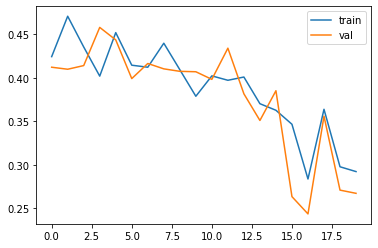

In [23]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "val"])

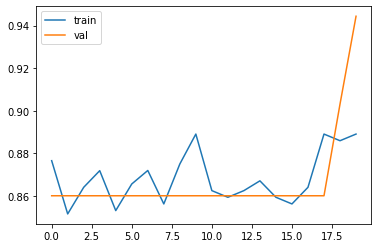

In [24]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"])
plt.legend(labels=["train", "val"])